In [88]:
#Importing libraries.
from __future__ import division
import os
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
from scipy.signal import correlate
from scipy.signal import convolve
from scipy import fftpack

In [9]:
def fourier_transformation(im, newsize=None):
    dft = np.fft.fft2(np.float32(im),newsize)
    return np.fft.fftshift(dft)

In [10]:
def inverse_ft(shift):
    f_ishift = np.fft.ifftshift(shift)
    img_back = np.fft.ifft2(f_ishift)
    return np.abs(img_back)

In [2]:
#Find the all .jpg files in the folder and declare the path.
#Read the every images and add to the list.
#Sort them according to number of pictures.
imageformat=".jpg"
path="/Users/egeoguzman/Desktop/dip_hw3/input"
files=[os.path.join(path,f) for f in os.listdir(path) if f.endswith(imageformat)]
files.sort()
files

['/Users/egeoguzman/Desktop/dip_hw3/input/noisy1.jpg',
 '/Users/egeoguzman/Desktop/dip_hw3/input/noisy2.jpg',
 '/Users/egeoguzman/Desktop/dip_hw3/input/noisy3.jpg']

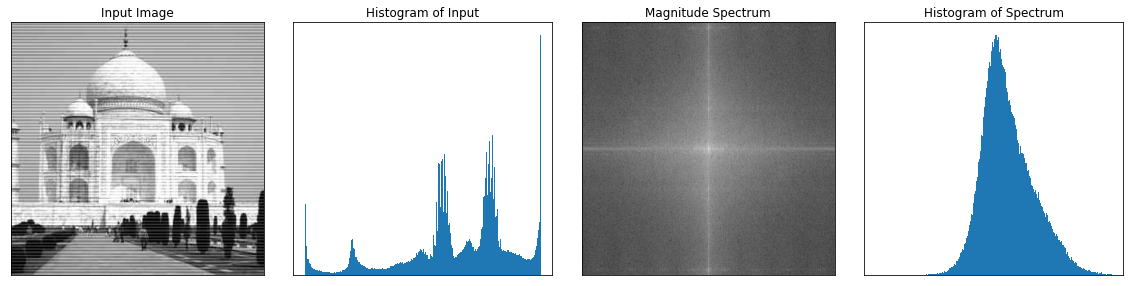

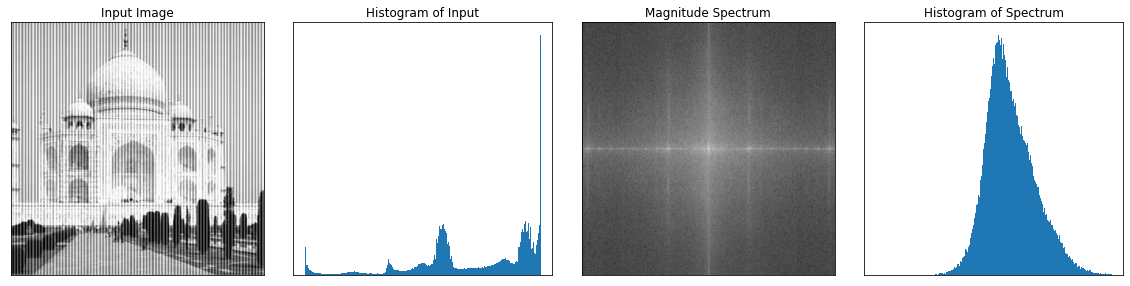

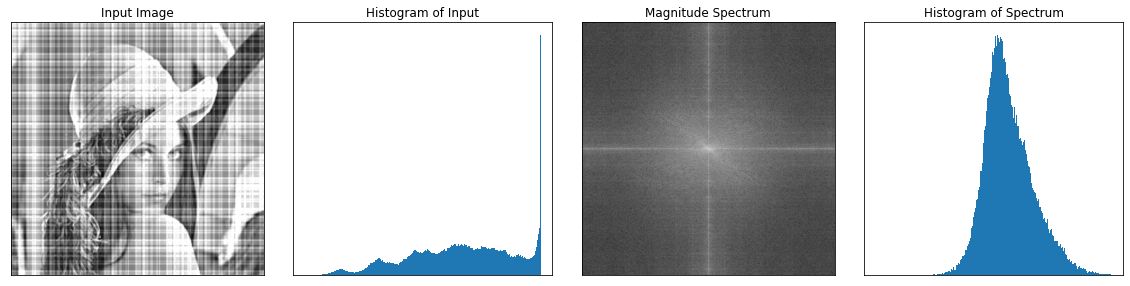

In [3]:
def perform_fourier(f):
    for idx,i in enumerate(f):
        
        img = cv.imread(i,cv.IMREAD_GRAYSCALE)
        f = np.fft.fft2(img)
        fshift = np.fft.fftshift(f)
        magnitude_spectrum = 20*np.log(np.abs(fshift))
        
        cv.imwrite('./fourier_transformed/transformed{}.jpg'.format(idx),magnitude_spectrum)

        grid = plt.GridSpec(4, 4, wspace=0.1, hspace=0.1)
        plt.figure(figsize=(20,20))
        plt.subplot(grid[0, 0]),plt.imshow(img, cmap = 'gray')
        plt.title('Input Image'), plt.xticks([]), plt.yticks([])
        plt.subplot(grid[0, 1]),plt.hist(img.ravel(),256,[0,256])
        plt.title('Histogram of Input'), plt.xticks([]), plt.yticks([])
        plt.subplot(grid[0, 2]),plt.imshow(magnitude_spectrum, cmap = 'gray')
        plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
        plt.subplot(grid[0, 3]),plt.hist(magnitude_spectrum.ravel(),256,[0,256])
        plt.title('Histogram of Spectrum'), plt.xticks([]), plt.yticks([])
        plt.show() 
        
perform_fourier(files)

In [49]:
def low_pass_filter2(f):
	
    # Write low pass filter here
    for idx,i in enumerate(f):
        img = cv.imread(i,0)
        imf = fourier_transformation(img, (img.shape[0],img.shape[1])) 
        mask = np.zeros((img.shape[0],img.shape[1]),np.uint8)                              #Box Filter of 20X20 size
        mask[(img.shape[0]//2-35):img.shape[0]//2+35, img.shape[1]//2-35:img.shape[1]//2+35] = 1
        img_out = inverse_ft(imf*mask).astype('uint8')
        cv.imwrite('outputLP{}.jpg'.format(idx),img_out)
    return True, img_out
low_pass_filter2(files)

(True,
 array([[214, 208, 202, ..., 228, 224, 220],
        [221, 217, 213, ..., 231, 228, 225],
        [225, 223, 222, ..., 230, 229, 227],
        ...,
        [185, 177, 169, ..., 200, 197, 191],
        [195, 187, 180, ..., 212, 208, 202],
        [205, 198, 191, ..., 221, 217, 212]], dtype=uint8))

In [66]:
def high_pass_filter(f):
    for idx,i in enumerate(f):
        img_in = cv.imread(i,0)
        # Write high pass filter here
        imf = fourier_transformation(img_in, (img_in.shape[0],img_in.shape[1])) 
        mask = np.ones((img_in.shape[0],img_in.shape[1]),np.uint8)                            #Box Filter of 20X20 size
        mask[img_in.shape[0]//2-5:img_in.shape[0]//2+0.3, img_in.shape[1]//2-5:img_in.shape[1]//2+5] = 0
        img_out = inverse_ft(imf+mask).astype('uint8')
        cv.imwrite('outputeHP{}.jpg'.format(idx),img_out)
    return True, img_out
high_pass_filter(files)

TypeError: slice indices must be integers or None or have an __index__ method

In [53]:
def low_pass_filter(f):
    for idx,i in enumerate(f):
        img = cv.imread(i,0)
        fourier = np.fft.fft2(img)
        fourier_shift = np.fft.fftshift(fourier)
        magnitude_spectrum = 20*np.log(np.abs(fourier_shift))
        rows = img.shape[0]
        cols = img.shape[1]
        crow,ccol = rows//2 , cols//2
        fourier_shift[crow-3:crow+3, ccol-3:ccol+3] = 1
        
        fourier_ishift = np.fft.ifftshift(fourier_shift)
        img_back = np.fft.ifft2(fourier_ishift)
        img_back = np.abs(img_back)
        img_out = img_back
        img_out = np.array(img_out).astype('uint8')
        cv.imwrite('output{}.jpg'.format(idx),img_out)
    return True, img_out
low_pass_filter(files)

(True,
 array([[81, 89, 85, ..., 89, 65, 51],
        [88, 92, 92, ..., 94, 89, 85],
        [85, 92, 92, ..., 94, 92, 93],
        ...,
        [48, 10, 10, ..., 23, 17, 13],
        [46, 10, 10, ..., 23, 18, 15],
        [42, 11, 13, ..., 23, 19, 16]], dtype=uint8))

In [44]:
def high_pass_filter(f):
    for idx,i in enumerate(f):
        img = cv.imread(i,0)
        fourier = np.fft.fft2(img)
        fourier_shift = np.fft.fftshift(fourier)
        magnitude_spectrum = 20*np.log(np.abs(fourier_shift))
        rows = img.shape[0]
        cols = img.shape[1]
        crow,ccol = rows//2 , cols//2
        mask = np.zeros(fourier_shift.shape)
        mask[crow-50:crow+50, ccol-50:ccol+50] = 0
        print(mask)
        fourier_shift = fourier_shift * mask
        fourier_ishift = np.fft.ifftshift(fourier_shift)
        img_back = np.fft.ifft2(fourier_ishift)
        img_back = np.abs(img_back)
        img_out = img_back
        img_out = np.array(img_out).astype('uint8')
        cv.imwrite('output_HP{}.jpg'.format(idx),img_out)
    return True, img_out
high_pass_filter(files)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


(True,
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8))